Importing the libraries and dataset. Also taking a look at the dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [3]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


We will remove the situation column, the zero risk rows and transform the location into features.

In [4]:
slidings = slidings[slidings.risk!=0]
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
959,0,3,3,0,0,0,0,0,0,19.7
961,0,3,2,0,0,0,0,0,0,88.9
962,0,3,2,0,0,0,0,0,0,0.0
964,0,3,3,0,0,0,0,0,1,4.5
965,0,3,2,0,0,0,0,0,1,0.0


In [5]:
slidings['risk'].value_counts()

3    4715
2    1878
4    1017
1     322
Name: risk, dtype: int64

In [6]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7932 entries, 959 to 45894
Data columns (total 10 columns):
situation         7932 non-null int64
location          7932 non-null int64
risk              7932 non-null int64
victims           7932 non-null int64
deadly_victims    7932 non-null int64
length            7932 non-null int64
num_points        7932 non-null int64
in_place          7932 non-null int64
sliding           7932 non-null int64
Rain              7932 non-null float64
dtypes: float64(1), int64(9)
memory usage: 681.7 KB


In [7]:
slidings.sliding.value_counts()

0    4119
1    3813
Name: sliding, dtype: int64

In [10]:
slidings = pd.get_dummies(slidings,columns=['location'],drop_first=True)
slidings.head()

,situation,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain,location_5,...,location_89,location_94,location_96,location_99,location_106,location_109,location_114,location_116,location_117,location_118
959,0,3,0,0,0,0,0,0,19.7,0,...,0,0,0,0,0,0,0,0,0,0
961,0,2,0,0,0,0,0,0,88.9,0,...,0,0,0,0,0,0,0,0,0,0
962,0,2,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
964,0,3,0,0,0,0,0,1,4.5,0,...,0,0,0,0,0,0,0,0,0,0
965,0,2,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
teste = slidings['location_94'].sum()
teste

3

In [18]:
random_state = 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = slidings.drop(columns={'sliding','situation'},axis=1)
y= slidings['sliding']

model = RandomForestClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
X.head()

,risk,victims,deadly_victims,length,num_points,in_place,Rain,location_5,location_7,location_8,...,location_89,location_94,location_96,location_99,location_106,location_109,location_114,location_116,location_117,location_118
959,3,0,0,0,0,0,19.7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
961,2,0,0,0,0,0,88.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
962,2,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
964,3,0,0,0,0,0,4.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,2,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

           0       0.65      0.67      0.66       827
           1       0.62      0.60      0.61       760

    accuracy                           0.64      1587
   macro avg       0.63      0.63      0.63      1587
weighted avg       0.64      0.64      0.64      1587



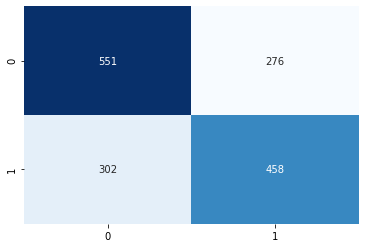

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

The maximum precision for  2  depth found was  0.686  with  20  estimators.
The maximum accuracy for  2  depth found was  0.580  with  25  estimators.

The maximum precision for  3  depth found was  0.690  with  60  estimators.
The maximum accuracy for  3  depth found was  0.593  with  25  estimators.

The maximum precision for  4  depth found was  0.673  with  20  estimators.
The maximum accuracy for  4  depth found was  0.604  with  80  estimators.

The maximum precision for  5  depth found was  0.669  with  65  estimators.
The maximum accuracy for  5  depth found was  0.614  with  45  estimators.

The maximum precision for  6  depth found was  0.679  with  60  estimators.
The maximum accuracy for  6  depth found was  0.623  with  45  estimators.

The maximum precision for  7  depth found was  0.660  with  40  estimators.
The maximum accuracy for  7  depth found was  0.635  with  65  estimators.

The maximum precision for  8  depth found was  0.667  with  95  estimators.
The maximum 

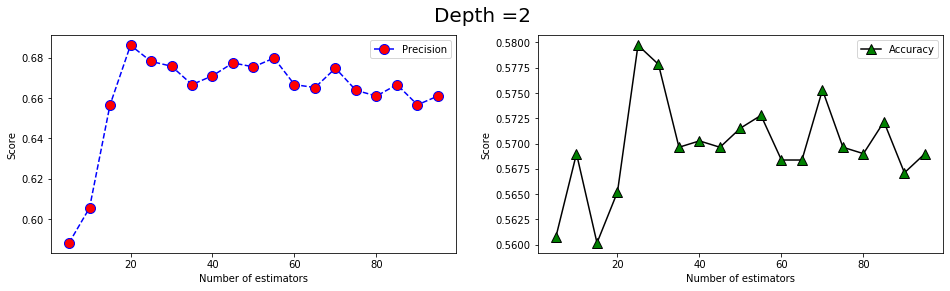

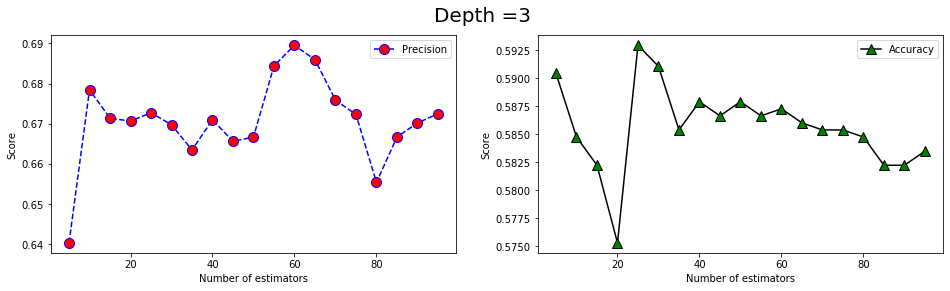

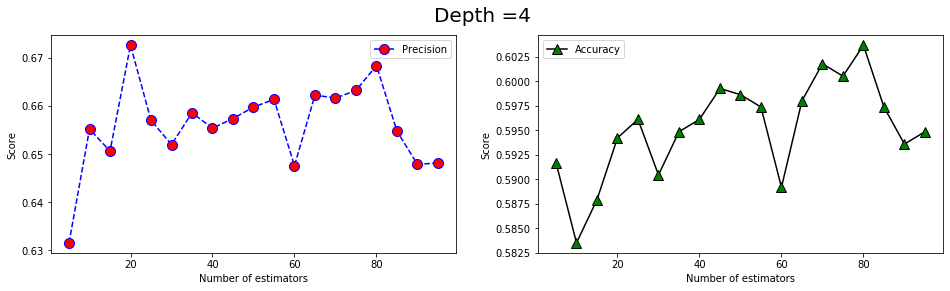

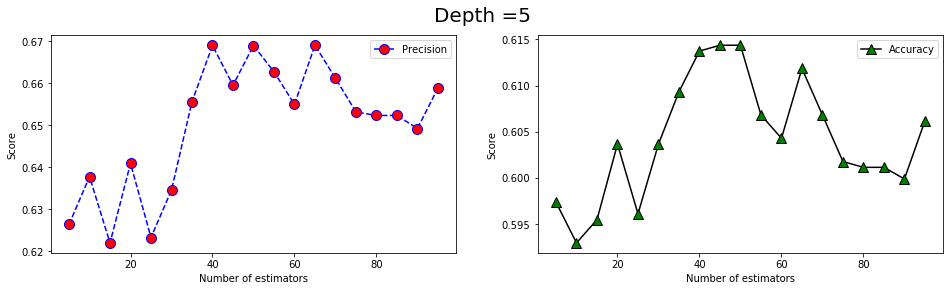

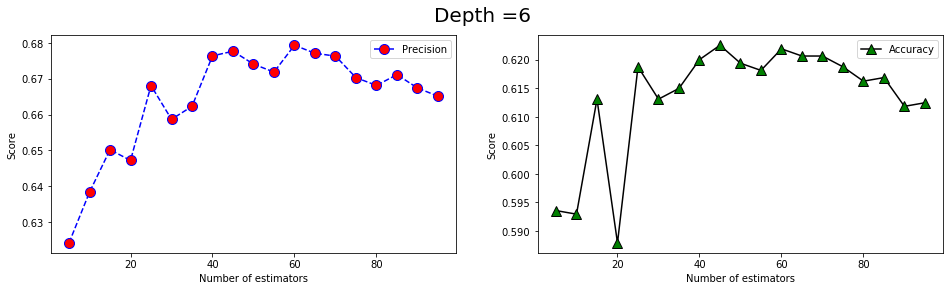

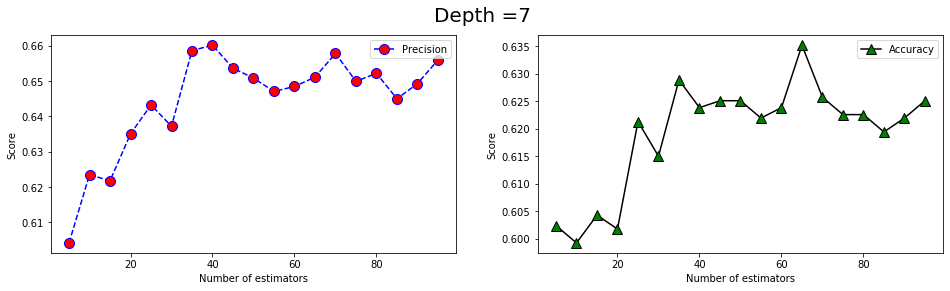

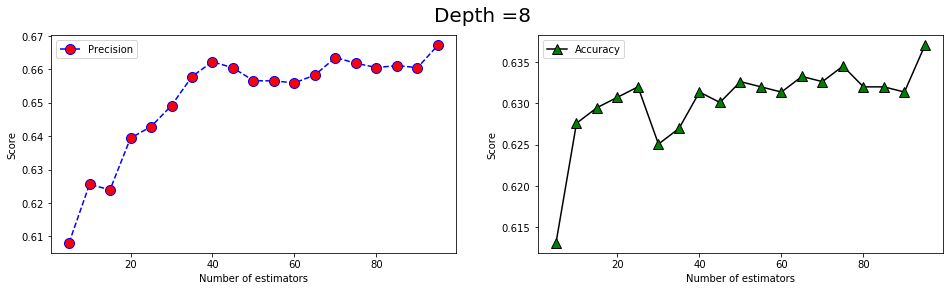

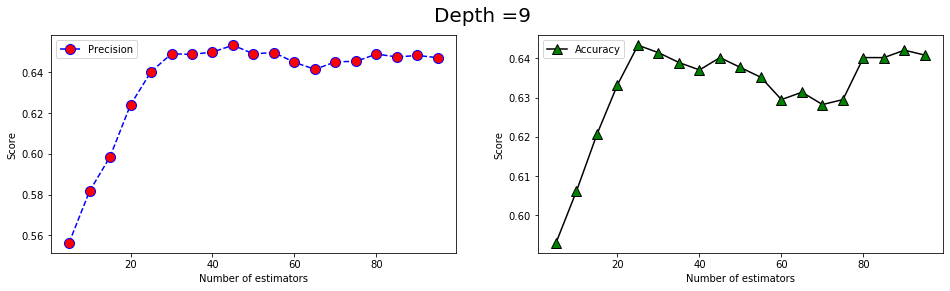

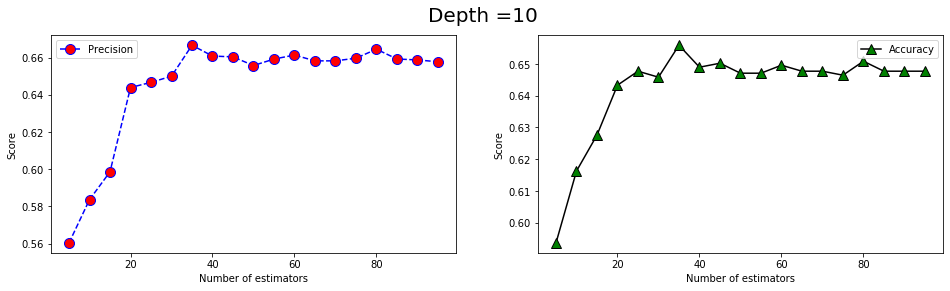

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score

for depth in range (2,11):
    precision = []
    accuracy = []
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        precision.append(precision_score(y_test,predictions))
        accuracy.append(accuracy_score(y_test,predictions))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))
    fig.suptitle('Depth ='+str(depth),fontsize=20)
    ax1.plot(range(5,100,5),precision,label='Precision',color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10,)
    ax2.plot(range(5,100,5),accuracy,label='Accuracy',color='black',marker='^', markerfacecolor='green',markersize=10)
    ax1.set(xlabel='Number of estimators', ylabel='Score')
    ax2.set(xlabel='Number of estimators', ylabel='Score')
    ax1.legend()
    ax2.legend()
    print('The maximum precision for ',depth,' depth found was ','%.3f' %max(precision),' with ',precision.index(max(precision))*5+5,' estimators.')
    print('The maximum accuracy for ',depth,' depth found was ','%.3f' %max(accuracy),' with ',accuracy.index(max(accuracy))*5+5,' estimators.\n')
    

Depth = 10 and estimators = 35 seems to be a reasonable choice, so we will take a more in-depth look with these hyperparameters.

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       827
           1       0.67      0.56      0.61       760

    accuracy                           0.66      1587
   macro avg       0.66      0.65      0.65      1587
weighted avg       0.66      0.66      0.65      1587



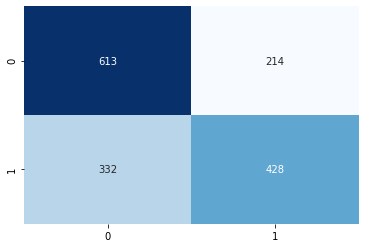

In [22]:
depth = 10
estimators = 35
model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [23]:
model.score(X,y)

0.6836863338376198

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
scores

array([0.48866499, 0.46599496, 0.48675914, 0.59142497, 0.54224464,
       0.55359395, 0.54602774, 0.48171501, 0.50567465, 0.56620429])

In [25]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.52 (+/- 0.08)


In [26]:
scores_precision = cross_val_score(model, X, y, cv=10, scoring='precision')
scores_precision

array([0.45121951, 0.46579805, 0.3030303 , 0.60142349, 0.64516129,
       0.64835165, 0.55555556, 0.421875  , 0.456     , 0.60215054])

In [27]:
print("precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))

precision: 0.52 (+/- 0.21)


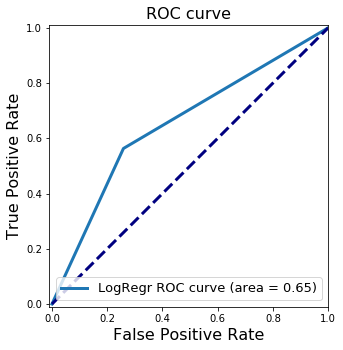

In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

In [29]:
importances = model.feature_importances_
for i in range(X.shape[1]):
    print( X.columns[i],"%.4f" % importances[i])

risk 0.1206
victims 0.0038
deadly_victims 0.0006
length 0.0651
num_points 0.0158
in_place 0.0119
Rain 0.5166
location_5 0.0003
location_7 0.0007
location_8 0.0005
location_9 0.0004
location_10 0.0011
location_11 0.0006
location_12 0.0000
location_14 0.0002
location_16 0.0007
location_17 0.0028
location_18 0.0000
location_20 0.0000
location_21 0.0027
location_24 0.0086
location_25 0.0020
location_28 0.0012
location_31 0.0025
location_33 0.0000
location_35 0.0001
location_39 0.0052
location_40 0.0020
location_41 0.0000
location_43 0.0000
location_44 0.0000
location_45 0.0023
location_46 0.0004
location_47 0.0004
location_48 0.0002
location_49 0.0156
location_50 0.0030
location_55 0.0007
location_58 0.0202
location_60 0.0579
location_61 0.0001
location_67 0.0001
location_70 0.0003
location_71 0.0095
location_72 0.0009
location_74 0.0036
location_76 0.0095
location_77 0.0006
location_78 0.0053
location_79 0.0199
location_81 0.0004
location_83 0.0001
location_84 0.0110
location_86 0.0100
lo

There was a slight improvement over the last few attempts, we can still try and remove the locations with few entries.